In [1]:
import sys
sys.path.append('..')

import numpy as np 
import pandas as pd 

from mod.SimSale import SimSale
from mod.Demand import Demand
from numba import jit

# from numdifftools import Hessian,Jacobian

## 1.模拟数据 及 待估计参数

In [2]:
sim_sale=SimSale(level_size=[3,3],seed=10)
sale_df = sim_sale.generate_sale(lam=1000,size=200,un_ava_frac=0.25,un_ava_mix=True)
print(sim_sale.attr_f_list[0])
print(sim_sale.attr_f_list[1])
print(sim_sale.attr_pi_list[0])
print(sim_sale.attr_pi_list[1]) 
mod = Demand(data=sale_df, 
             goods_attr={'A': list('abc'), 'B': list('abc')})
sale_df

a    0.479890
b    0.104251
c    0.415859
Name: A, dtype: float64
a    0.267030
b    0.349371
c    0.383599
Name: B, dtype: float64
          a         b         c
a  1.000000  0.461524  0.122328
b  0.620133  1.000000  0.382958
c  0.861233  0.742800  1.000000
          a         b         c
a  1.000000  0.130495  0.671022
b  0.125416  1.000000  0.203503
c  0.767916  0.275686  1.000000


,A_a*B_a,A_a*B_b,A_a*B_c,A_b*B_a,A_b*B_b,A_b*B_c,A_c*B_a,A_c*B_b,A_c*B_c
0,NaN,NaN,270.0,34.0,114.0,41.0,114.0,139.0,159.0
1,270.0,165.0,NaN,NaN,34.0,54.0,126.0,146.0,144.0
2,128.0,168.0,325.0,NaN,42.0,58.0,99.0,151.0,NaN
3,242.0,173.0,NaN,NaN,46.0,59.0,112.0,151.0,168.0
4,129.0,151.0,306.0,58.0,38.0,NaN,124.0,127.0,NaN
...,...,...,...,...,...,...,...,...,...
195,123.0,290.0,206.0,48.0,36.0,NaN,121.0,NaN,167.0
196,265.0,303.0,NaN,30.0,35.0,30.0,124.0,NaN,159.0
197,130.0,NaN,181.0,31.0,203.0,25.0,98.0,NaN,161.0
198,NaN,151.0,273.0,NaN,39.0,54.0,124.0,164.0,151.0


## 2.参数估计

     fun: 328954.9319686298
 message: ['Maximum number of iteration reached']
    nfev: 46261
    nhev: 0
     nit: 1000
    njev: 540
  status: 0
 success: True
       x: array([ 0.86248515, -0.65867949,  0.71048686, -0.47686912, -0.20719712,
       -0.10978797, -0.21306837, -2.1239398 , -0.7135153 , -0.27375993,
        1.75085808,  0.96506361, -1.7800049 ,  0.86690113, -1.66288694,
       -2.2056761 ,  1.12478998, -0.29924452])
([array([0.48136004, 0.10515662, 0.41348334]), array([0.26644996, 0.34892551, 0.38462453])], [array([0.44693351, 0.10679168, 0.32882255, 0.43198427, 0.852061  ,
       0.72413448]), array([0.14430253, 0.70410048, 0.15937484, 0.09924193, 0.75487613,
       0.42574218])])


0.9670384634667929

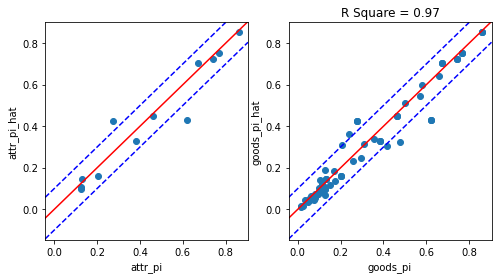

In [3]:
# method='dual_annealing'
mod.fit(method='dual_annealing',maxiter=1000)
print(mod.theta_hat)
print(mod.init_theta(mod.theta_hat.x,to_goods=False))

mod.score(SimSale=sim_sale,plot=True)

In [ ]:
mod.attr_trans

In [ ]:
mod.conf_int(SimSale=sim_sale,bootstrap_n=30)

In [ ]:
mod.init_theta(np.zeros(18))

In [ ]:
int_dw

In [ ]:
c